In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow
import tensorflow.keras as keras
keras.__version__

'2.4.0'

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
train_labels.shape

(60000,)

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
train_images.ndim # 3 dimensional tensor

3

In [9]:
train_labels.ndim

1

In [10]:
import numpy as np

print(np.unique(train_labels))
print(len(np.unique(train_labels)))

[0 1 2 3 4 5 6 7 8 9]
10


In [11]:
np.unique(train_labels, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

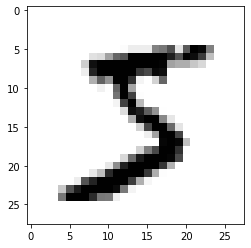

In [12]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0], cmap = plt.cm.binary)
plt.show()

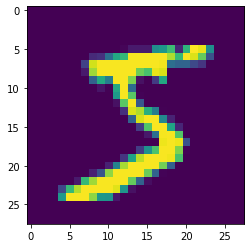

In [13]:
plt.imshow(train_images[0])
plt.show()

In [14]:
train_images.dtype

dtype('uint8')

In [15]:
train_images = train_images.reshape((-1, 28 * 28)) 
train_images = train_images.astype('float32') / 255

#train_images = train_images.reshape((-1, 28 * 28)) / 255.0
train_images.shape

(60000, 784)

In [16]:
test_images = test_images.reshape((10000, 28 * 28)) / 255.0
test_images.shape

(10000, 784)

In [17]:
train_images.dtype

dtype('float32')

In [18]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels.shape

(60000, 10)

In [19]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = ((28 * 28,))))
network.add(layers.Dense(10, activation = 'softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])
#network.compile(loss = 'categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'])

In [20]:
#network = models.Sequential([
#                             layers.Dense(512, activation = 'relu', input_shape = ((28 * 28,))),
#                             layers.Dense(10, activation = 'softmax')   
#                            ])

In [21]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = network.fit(train_images, train_labels, epochs = 5, batch_size = 128)
#history = network.fit(train_images, train_labels, epochs = 5, batch_size = 128, 
#                       validation_data = (test_images, test_labels))

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2547 - accuracy: 0.9262
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1046 - accuracy: 0.9690
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0691 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - ETA: 0s - loss: 0.0496 - accuracy: 0.98 - 4s 8ms/step - loss: 0.0494 - accuracy: 0.9850
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0378 - accuracy: 0.9887


In [34]:
#test_loss, test_acc = network.evaluate(test_images, test_labels)
#print('test_loss: ', test_loss)
#print('test_acc: ', test_acc)

history_test = network.evaluate(test_images, test_labels)
print(history_test, type(history_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9795
[0.0667538121342659, 0.9794999957084656] <class 'list'>


In [24]:
import pandas as pd

df = pd.DataFrame(history.history)
df.head()

,loss,accuracy
0,0.254677,0.926217
1,0.104581,0.969017
2,0.069124,0.979567
3,0.049421,0.984950
4,0.037779,0.988733


<AxesSubplot:>

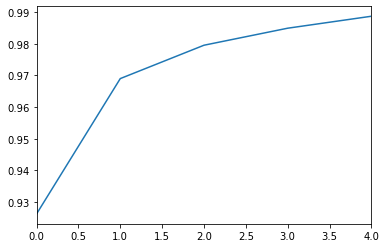

In [25]:
df['accuracy'].plot()

<AxesSubplot:>

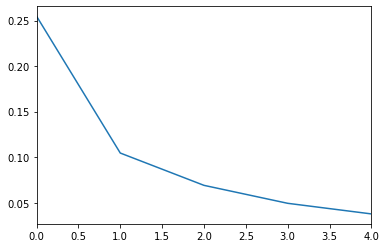

In [26]:
df['loss'].plot()